Neerja Aggarwal

Sep 24, 2021

Purpose: Create the output spectrum given a raw vector of reflectance/scattering amplitudes. 

Text(0, 0.5, 'Intensity [arb units]')

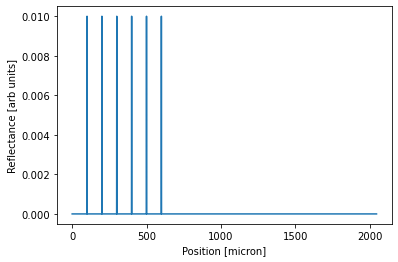

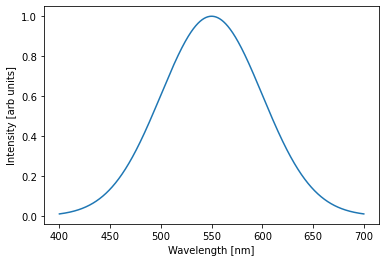

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import math

N = 2048 #length of vector
dz = 1e-6 # 1 micron units sampling
samplez = np.arange(N)*dz  # zvector
refR = np.zeros(N)
refR[0] = 1

sampleR = np.zeros(N)
sampleInd = [100,200,300,400,500,600]
sampleR[sampleInd] = 1e-2

plt.figure()
plt.plot(samplez*1e6,sampleR)
plt.xlabel('Position [micron]')
plt.ylabel('Reflectance [arb units]')

wvrange = (400, 700) #nm units
dl = (wvrange[1]-wvrange[0])/N
wvvec = np.linspace(wvrange[0],wvrange[1], N)
fwhm = 50 # nm
sourceSpec = sig.gaussian(N,int(fwhm/dl))
roh = 1

wvnum = 2*np.pi/(wvvec*1e-9)

plt.figure()
plt.plot(wvvec,sourceSpec)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [arb units]')



In [19]:
# iterate through each element in sample
# compute the spectral contribution 
# rewrite as a linear system to speed up the code?
# comment out the autocorr term to make this go faster


ID = np.zeros_like(sourceSpec)

DC = roh/4*sourceSpec*(np.linalg.norm(refR)**2+ np.linalg.norm(sampleR)**2)
crosscorr = 0
autocorr = 0

for k in np.arange(len(sampleR)):
    crosscorr += roh/4*sourceSpec*math.sqrt(refR[0]*sampleR[k])*(np.exp(2j*wvnum*(samplez[0]-samplez[k]))+np.exp(-2j*wvnum*(samplez[0]-samplez[k])))
#     for k2 in np.arange(len(sampleR)):
#         if k == k2:
#             continue
#         autocorr +=roh/4*sourceSpec*math.sqrt(sampleR[k]*sampleR[k2])*(np.exp(2j*wvnum*(samplez[k]-samplez[k2]))+np.exp(-2j*wvnum*(samplez[k]-samplez[k2])))

ID = DC+crosscorr+autocorr


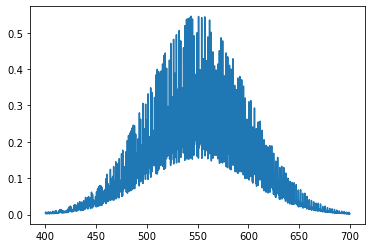

In [20]:
plt.plot(wvvec,abs(ID))